# Tutorial 1: Introduction to R
### Summer School in Statistics for Astronomers XVII, June 2022  
### Instructor: Eric Feigelson (Center for Astrostatistics, Penn State University)

R is a powerful software environment for data analysis, graphics, and especially statistical analysis. It is available free to the public at www.r-project.org with easily installed binaries for Linux, MacOS and Windows.  This notebook provides an introduction to R designed for students and researchers in astronomy.  No previous experience is needed, although some familiarity with scripting languages like Matlab or IDL is helpful.  

### Running the Jupyter notebooks 

During the Summer School, we are running these Jupyter notebooks in Google's Colaboratory environment [here](https://colab.research.google.com/drive/1iz6ILnVGt8Qc6UR1l7oTPou4l6WSrw9S?usp=sharing).  To run them here, click the **Connect** button in the upper-right section of the page.  When you encounter a Jupyter cell with an R script, click the black circle with arrow button to run the code. You are encouraged to investigate options and learn further by editing the script; again click the black circle to run the cell. 

You can also run them in Python on your local computer; Python's *anaconda* distribution and *conda* package management system automatically include Jupyter Notebooks as an application accessed through the *Anaconda Navigator*.  However, it is possible that your Anaconda release did not automatically include the R kernel for Jupyter.  You can tell whether it is present if the R logo (blue R in front of gray ellipse) is shown at the top-right of the Jupyter page.  If it is missing, then the code cells below will fail upon execution. To install the R kernel within Python, type: **conda install -c r r-irkernel**.  Alternatively, you can make R available to Jupyter from an R console by typing: **install.packages('IRkernel')  ;  IRkernel::installspec()**.  For further discussion of the relationship between Python, R, Jupyter and other notebook environments, see [here](https://www.datacamp.com/community/blog/jupyter-notebook-r). 

Some basic operational information:
- R is driven by the command line in the R console.  Double-click the R icon or (in Linux) type 'R' in the terminal to open the console. 
- R has >100,000 'functions' that perform various tasks. Each function uses () brackets to list arguments and parameters.  
- Every function has a 'help(fn)' page telling how it is used, what operation is run, and what output it produces with references and examples that can be cut-and-paste into an R console. It is essential for both novice and experienced R programmers to read help files.
- A hash mark ( # ) denotes comments in an R script.  A semi-colon ( ; ) has the same action as a carriage return
- The commands in the Summer School tutorials can be run interactively in Jupyter, or cut-and-pasted into a separate R console.

****

**In Section I** we examine and set up our software environment. *sessionInfo()* tells the operating system, and basic pre-installed packages. Try this both in Google Colaboratory and on your local R console.  *getwd()* and *setwd()* are commonly used functions at the beginning of a session -- *wd* stands for 'working directory'.  Google Colaboratory does not allow changing directories, but you will want to create a directory for our Summer School work on your local computer.  *library()* pops up a new window listing the CRAN packages currently available to you.  Remember there are ~19000 more!  Finally, we run *citation()* that gives the citation to R for publications. Every CRAN package has a corresponding *citation(package)* that should be used for publications.

In [1]:
# I.  Set up your session

sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.4

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.3     utf8_1.2.2      digest_0.6.29   crayon_1.5.1   
 [5] IRdisplay_1.1   repr_1.1.4      lifecycle_1.0.1 jsonlite_1.8.0 
 [9] evaluate_0.15   pillar_1.7.0    rlang_1.0.2     cli_3.3.0      
[13] uuid_1.1-0      vctrs_0.4.1     ellipsis_0.3.2  IRkernel_1.3   
[17] tools_4.2.0     glue_1.6.2      fastmap_1.1.0   compiler_4.2.0 
[21] base64enc_0.1-3 pbdZMQ_0.3-7    htmltools_0.5.2

In [2]:
getwd()                     # find working directory.  
#setwd('/Users/ericfeigelson/Desktop/Rdir')  # set working directory if you run 
                                             # locally on your computer
#getwd()                     # see the working directory has changed

[1] "/Users/japa6985/Documents/AstroStatistics/Labs"

In [3]:
library()                   # see packages installed on your computer
                            # ~30 are installed automatically with R
citation()                  # quote this citation in any publication using R


To cite R in publications use:

  R Core Team (2022). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2022},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.


R packages available

Packages in library ‘/Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/library’:

IRdisplay               'Jupyter' Display Machinery
IRkernel                Native R Kernel for the 'Jupyter Notebook'
KernSmooth              Functions for Kernel Smoothing Supporting Wand
                        & Jones (1995)
MASS                    Support Functions and Datasets for Venables and
                        Ripley's MASS
Matrix                  Sparse and Dense Matrix Classes and Methods
NADA                    Nondetects and Data Analysis for Environmental
                        Data
R6                      Encapsulated Classes with Reference Semantics
base                    The R Base Package
base64enc               Tools for base64 encoding
boot                    Bootstrap Functions (Originally by Angelo Canty
                        for S)
bslib                   Custom 'Bootstrap' 'Sass' Themes for 'shiny'
                        and 'rmarkdown'
cla

****

**Section II** creates a simple R object -- a vector of four integers -- and functions that tell its characteristics.  *ls()* is useful to see what objects are in your current session.  The *str* function is very useful for seeing the structure of complex R objects produced by advanced statistical functions. Note that the content of an object is displayed on the console by just stating its name; no *print* or *show* command is needed. The *cat* function gives a more elegant way to display on the console. 

*write* and *save* bring R objects out of your session onto your disk in ASCII and binary formats respectively. CRAN package *FITSio* provides output in astronomers' FITS format.   

R vectors and arrays start at index 1, unlike Python where the first element has index 0.  This incompatibility can complicate programs that entangle the two languages.  It is very useful to [link text](https://)

In [4]:
# II. Create and characterize a vector

a <- c(33, 44, 92, 58)      # combine numbers into a vector
length(a)
sum(a)
median(a)  ;  mad(a)
ls()                        # list names of objects in your environment
class(a)                    # state the `class' of an R object (described in III below)
str(a)                      # state the structure of an R object
summary(a)                  # many R objects have a built-in 'summary' function

[1] 4

[1] 227

[1] 51

[1] 18.5325

[1] "a"

[1] "numeric"

 num [1:4] 33 44 92 58


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   41.25   51.00   56.75   66.50   92.00 

In [5]:
a                           # display the contents of an R object on the console
# Annotated write to console. The \n symbol is a carriage return.
cat('Sum of ', length(a), ' elements in the vector a = ', sum(a), '\n')

write(file='output', a)     # write an ASCII file into the working directory
save(file='output_bin', a)  # write a binary file
save(file='output_bin', a)  # error because 'Save' is not a known function.
                            # R syntax is case sensitive.

[1] 33 44 92 58

Sum of  4  elements in the vector a =  227 


In [6]:
# Manipulation of vector indices

a[1:4]          # show all four elements of the vector
a[3]            # note that R vectors start with index 1 not 0, unlike Python
a > 40          # logical operation
sum(a[a>40])    # note the self-referential use of vector/array indices here
which.max(a)    # R has many built-in functions for vectors and arrays
match(44, a)

[1] 33 44 92 58

[1] 92

[1] FALSE  TRUE  TRUE  TRUE

[1] 194

[1] 3

[1] 2

****

**Section III** highlights classes and packages.  Base-R places objects into several: numeric, character, logical, vector, matrix, factor, data.frame, list, and dozens of others designed by advanced R functions and CRAN packages. *plot, print, summary* functions are adapted to class objects; see e.g. *methods(summary)*.  

Two particularly important classes are the 'data frame' used for tabular data and the 'list' used as a bucket with heterogeneous content.  The data frame is a 2-dimensional array with associated column names. The list class allows a hierarchical structure of R objects such as scalars, vectors, arrays, and attributes.  Here we make a hierarchical list, use 'str' (structure) to show its contents, and access an element of the list using the $ delimiter. 

In [7]:
# III.  R classes and packages

# Make and write a data.frame, a 2D array with column names

d <- data.frame(cbind(seq(1:4), a, a^3))  # Bind columns into data frame
class(d)
names(d) <- c('ID', 'a', 'a_cubed') # Column names for data frame                                         
d2 <- d[-4,-1]                            # Remove 4th row and 1st column
d ; d2
write.table(d, file='d.txt', quote=FALSE, row.names=FALSE)

[1] "data.frame"

ID,a,a_cubed
<dbl>,<dbl>,<dbl>
1,33,35937
2,44,85184
3,92,778688
4,58,195112


,a,a_cubed
,<dbl>,<dbl>
1,33,35937
2,44,85184
3,92,778688


In [8]:
# Make and show a list.

b_list <- list(star=c('Sirius', 'Procyon'), SpTy=c('O','B','A'), Hubble_km.s=68)
str(b_list)
b_list[['SpTy']] = list(subtype=seq(0.1:0.9, by=0.1))
str(b_list)
b_list$SpTy$subtype[1:3]

List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       : chr [1:3] "O" "B" "A"
 $ Hubble_km.s: num 68
List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       :List of 1
  ..$ subtype: num [1:10] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
 $ Hubble_km.s: num 68


[1] 0.1 0.2 0.3

The 19,000+ CRAN packages are obtained on-the-fly as you need them. The *install.packages()* function, needed only once in the lifetime of your computer, downloads the chosen package from *https://cloud.r-project.org* or a mirror site.  But the *library()* command is frequently needed to bring the package into the current R session.  

There is no useful index of the 19,000+ CRAN packages and their many functions. The collection expanded exponentially during the 2000s and is continues to grow by several packages every day.  Expert volunteers in ~40 statistical areas update lists of CRAN packages in their area; these are accesses on the Web at [CRAN Task Views](https://cran.r-project.org/web/views/). Task Views of particular interest to astronomers include _Bayesian_, _Cluster_, _HighPerformanceComputing_, _MachineLearning_, _Multivariate_, _Optimization_, _Robust_, _Spatial_, _Survival_, and _TimeSeries_. 

Astronomy-specific packages (e.g. stellar evolutionary tracks, celestial mechanics) are listed in the _ChemPhys_ CRAN Task View. The package _FITSio_ reads astronomical FITS formatted files and headers, converting them into an R list. The package _astrolibR_ is a collection of long-established functionalities useful in astronomical research, translated from the _IDL Astronomy Library_.

Unfortunately, the Google Colaboratory does not allow installation of new packages by the user.  So portions of our notebooks are best run by cut-and-paste into an R console on your local computer.

This is a good moment to examine some R help files.  Try *help(sum)*, *help(cbind)*, and *help(mad)* for functions we have already used.  All R users, both novice and expert, are constantly looking at help files to learn what functions do, the syntax of their use, and related functions. 

R help files give essential information on all functions in a standard format:  
1. The top lines give the package where the function resides and a brief description.  
2. _Usage_ gives the list of inputs for the function.  Input parameters with an _=_ have a default and do not need to be specified by the user.  
3. _Arguments_ describes these input parameters.  
4. _Details_ summarizes the functionality including formulae and algorithms. 
5. _Value_ gives the output of the function.  Typically the program specifies _outfn <- fn(x,y,z, option='special')_ so the full list of output values are available for use, such as _plot(outfn\$x, outfn\$y)_. 
6. _References_ to published literature where the function is described.
7. _See also_ links to R functions with related purpose to the current function.
8. _Examples_ show usage of the function, often with a built-in dataset.  Examples in R help files can always be cut-and-pasted into any R console.  

****

**Section IV** shows that R knows elementary math.


In [9]:
# IV. Arithmetic, algebra, trigonometry, and formatting numerics

5 + 3 ; 5-3 ; 5*3 ; 5/3 ; 5^3
x <- 5 ; y <- 3
x+y 

[1] 8

[1] 2

[1] 15

[1] 1.666667

[1] 125

[1] 8

In [10]:
sin(0)  ; sin(pi/2)         # note angles are in radians
ang <- seq(0, pi/2, length=30) 
sin(ang)

[1] 0

[1] 1

[1] 0.00000000 0.05413891 0.10811902 0.16178200 0.21497044 0.26752834
 [7] 0.31930153 0.37013816 0.41988910 0.46840844 0.51555386 0.56118707
[13] 0.60517422 0.64738628 0.68769946 0.72599549 0.76216206 0.79609307
[19] 0.82768900 0.85685718 0.88351204 0.90757542 0.92897672 0.94765317
[25] 0.96354999 0.97662056 0.98682652 0.99413796 0.99853341 1.00000000

In [11]:
trunc(12345.6789) ; round(12345.6789)  
format(12345.6789, digits=2, scientific=TRUE)   

log(20)  ;  log10(20)   # log() in R is base-e. Use log10() for base-10 logarithms.

[1] 12345

[1] 12346

[1] "1.2e+04"

[1] 2.995732

[1] 1.30103

> **Exercise:** Practice R syntax.  Practice with some elementary R functions: arithmetic and algebra, 2-dimensional array manipulation, producing multi-element lists.  Write a brief program exercising program flow control (if, ifelse, when, repeat, break, stop, etc.). Use help files!

****

**Section V** shows that R can be used for calculations based on analytical equations from mathematics, physics or astrophysics.  Here we calculate galaxy luminosity distances for a Euclidean and a $\Lambda$CDM relativistic universe.  This is our first exercise of the *function()* function, allowing the user to create a new procedure for later use.  The content of a new function lies within curly brackets, {}, and can be simple or complicated.   

We also have our first experience with R's basic 2-dimensional plotting function, *plot()*.  It is wonderfully useful and flexible giving publication-quality graphics.   For its many option, see help(par) ... the longest help file I know!    

In [12]:
# V. Astrophysical calculations of galaxy distances 

# The `function' function: Note how one function uses another
# This how R builds new capabilities based on old capabilities in a compact syntax.

# First, make a simple calculation without functions: galaxy distances in Mpc for six redshifts  

z <- seq(0.0, 0.5, 0.1)
z
H_0 <- 68  	 		               	# km/s/Mpc,  Planck value
speed.light <- 3.0E5          	# km/s
dist <- speed.light*z / H_0     # in Mpc
dist
class(dist)

[1] 0.0 0.1 0.2 0.3 0.4 0.5

[1]    0.0000  441.1765  882.3529 1323.5294 1764.7059 2205.8824

[1] "numeric"

In [13]:
# Now, make a more complicated relativistic calculation using new functions.

Omega_m <- (0.022068 + 0.12029) / (H_0/100)^2    
Omega_Lambda <- 0.6825                    # Planck satellite values

E.H0 <- function(redshift) {1/(sqrt(Omega_m*(1+redshift)^3 + Omega_Lambda))}

lum.dist <- function(redshift) {  
	luminosity.distance = (1 + redshift) * (speed.light/H_0) * integrate(E.H0, 0, redshift)$value 
	return(luminosity.distance)  }

distGR <- Vectorize(lum.dist)(z)

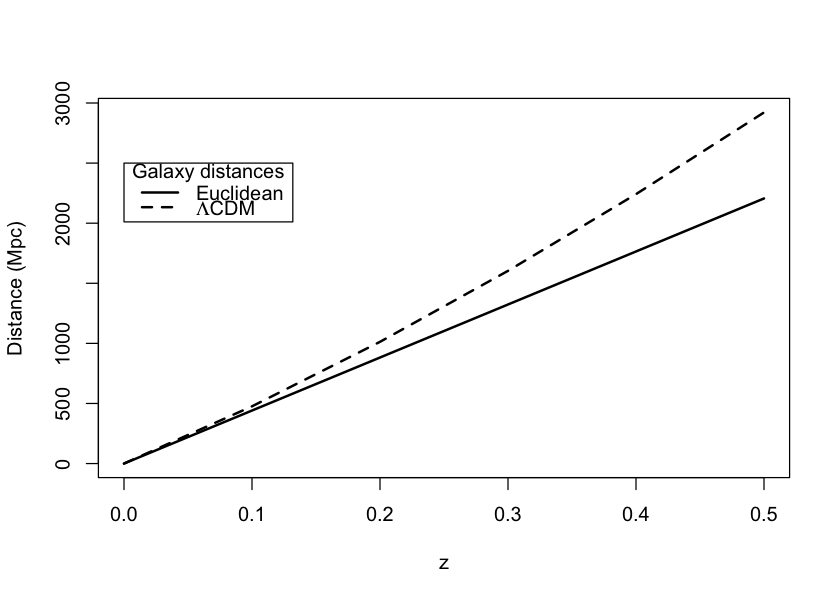

In [14]:
# Plot the results
# The 'plot' function has extensive options to change format; see 'help(par)'

options(jupyter.plot_scale=1)
options(repr.plot.width = 7, repr.plot.height = 5)

plot(z, distGR, type='l', lty=2, lwd=2, ylab='Distance (Mpc)')
lines(z, dist, lty=1, lwd=2)   
legend(0.0, 2500, lty=c(1,2), lwd=c(2,2), title='Galaxy distances', 
     	legend=c('Euclidean', expression(Lambda*CDM)))

> **Exercise** Integrate an astrophysical function.  Estimate the age of the Universe as a function of redshift for a standard $\Lambda$CDM universe model: 
$$ t(z) = H_0^{-1} \int_{z}^{\infty}\frac{dz'}{(1+z')h(z')} $$ 
where $ h(z) = \sqrt{(1-\Omega_{total})(1+z)^2 + \Omega_m(1+z)^3 + \Omega_{\Lambda} } $, $\Omega_m$ is the matter density parameter, and $\Omega_{\Lambda}$ is the dark energy density parameter. Plot the age of the Universe vs. redshift ($z=0$ to 10) for three hypothetical universes: matter-dominated ($\Omega_m=1.0$ and $\Omega_{\Lambda}=0.0$), dark-energy-dominated ($\Omega_m=0.01$ and $\Omega_{\Lambda}=0.99$), and a realistic universe ($\Omega_m=0.31$ and $\Omega_{\Lambda}=0.69$).  This problem and solution is courtesy of graduate student Phoebe Sandhaus, Penn State.

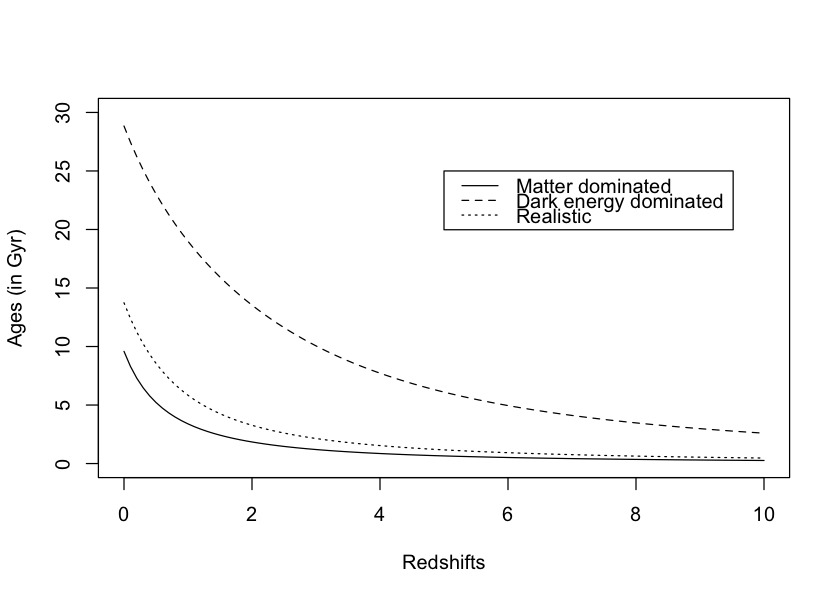

In [15]:
z22 <- seq(0,10,0.1)

hz1 <- function(red1, lam_m, lam_lam, lam_tot) {
    term1 <- (1 - lam_tot) * ((1 + red1)^2)
    term2 <- lam_m * ((1 + red1)^3)
    term3 <- term1 + term2 + lam_lam
    cd <- term3^0.5
    return(cd)
}

int1 <- function(red1, lam_m, lam_lam, lam_tot){
    hz2 <- hz1(red1, lam_m, lam_lam, lam_tot)
    te1 <- (1 + red1)*hz2
    te2 <- 1/te1
    return(te2)
}

tz1 <- function(red1, lam_m, lam_lam, lam_tot){
    t_age <- (1/68) * integrate(int1, red1, Inf, lam_m = lam_m,
                                lam_lam = lam_lam, lam_tot = lam_tot)$value
    t_age1 <- 977.79 * t_age
    return(t_age1)
}

ages_matter <- Vectorize(tz1)(z22, 1.0, 0.0, 1.)
ages_dark <- Vectorize(tz1)(z22, 0.01, 0.99, 1.)
ages_real <- Vectorize(tz1)(z22, 0.31, 0.69, 1.)

plot(z22, ages_matter, type='l', ylab='Ages (in Gyr)', xlab='Redshifts', ylim=c(0,30), lty=1)
lines(z22, ages_dark, type='l', lty=2)#, ylab='Ages (in Gyr)', xlab='Redshifts')
lines(z22, ages_real, type='l', lty=3)#, ylab='Ages (in Gyr)', xlab='Redshifts')

legend(5, 25, lty=c(1,2,3), legend=c('Matter dominated', 'Dark energy dominated', 'Realistic'))

****

**Section VI** gives our first astrostatistical calculation based on a (fictitious) dataset. Here we seek the distribution of galaxy X-ray luminosities from a sample of 12 galaxies where four are undetected. In statistical parlance, the astronomers' 'upper limits' are called 'left-censored' data points and are treated in a field of applied statistical called 'survival analysis'.  One of the most important results of 20th century statistics was the theorem by [Kaplan & Meier (1958)](https://www.jstor.org/stable/2281868) deriving the unique nonparametric maximum likelihood estimator for a randomly censored univariate dataset.  The KM paper has 62K citations and ~6M Google hits; the KM estimator has been used in ~800 astronomical studies.

Although base-R has an implementation of the KM estimator, we will use the one provided by CRAN pacakage *NADA*.  The methodology and cookbook are detailed in the volume 'Statistics for Censored Environmental Data Using Minitab and R' (D.Helsel, 2nd ed, 2012) and is introduced in Chpt. 10 of our textbook 'Modern Statistical Methods for Astronomy with R Applications' (Feigelson & Babu 2012).  

We start by installing *NADA*, one of many survival CRAN packages.  **This installation is not permitted by Google Colaboratory, so this section should be cut-and-pasted into your local R console.fco** We create a fictitious dataset of X-ray luminosities and apply NADA's *cenfit* function.  We use *str* to see the output from *cenfit* and various simple displays given in the *help(cenfit)* file.   


The downloaded binary packages are in
	/var/folders/ly/59qzp7vx2_v_dm33xgg2knbc0000gn/T//RtmpreKoDb/downloaded_packages


Loading required package: survival


Attaching package: ‘NADA’


The following object is masked from ‘package:stats’:

    cor




Formal class 'cenfit' [package "NADA"] with 1 slot
  ..@ survfit:List of 16
  .. ..$ n        : int 12
  .. ..$ time     : num [1:12] 43 42.9 42.3 41.7 41.6 41.2 41.1 40.7 40.6 40.2 ...
  .. ..$ n.risk   : num [1:12] 12 11 10 9 8 7 6 5 4 3 ...
  .. ..$ n.event  : num [1:12] 1 0 1 1 1 0 1 0 1 1 ...
  .. ..$ n.censor : num [1:12] 0 1 0 0 0 1 0 1 0 0 ...
  .. ..$ surv     : num [1:12] 0.917 0.917 0.825 0.733 0.642 ...
  .. ..$ std.err  : num [1:12] 0.087 0.087 0.137 0.18 0.225 ...
  .. ..$ cumhaz   : num [1:12] 0.0833 0.0833 0.1833 0.2944 0.4194 ...
  .. ..$ std.chaz : num [1:12] 0.0833 0.0833 0.1302 0.1711 0.2119 ...
  .. ..$ type     : chr "right"
  .. ..$ logse    : logi TRUE
  .. ..$ conf.int : num 0.95
  .. ..$ conf.type: chr "plain"
  .. ..$ lower    : num [1:12] 0.76 0.76 0.604 0.474 0.359 ...
  .. ..$ upper    : num [1:12] 1 1 1 0.993 0.924 ...
  .. ..$ call     : language survfit(formula = flip(obs), conf.type = conf.type)
  .. ..- attr(*, "class")= chr "survfit"


obs,n.risk,n.event,prob,std.err,0.95LCL,0.95UCL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39.7,1,1,0.0000000,NaN,NaN,NaN
39.9,2,0,0.2673611,0.15446121,0.00000000,0.5700995
40.2,3,1,0.2673611,0.15446121,0.00000000,0.5700995
40.6,4,1,0.4010417,0.16393707,0.07973092,0.7223524
40.7,5,0,0.5347222,0.15476143,0.23139540,0.8380490
41.1,6,1,0.5347222,0.15476143,0.23139540,0.8380490
41.2,7,0,0.6416667,0.14410082,0.35923425,0.9240991
41.6,8,1,0.6416667,0.14410082,0.35923425,0.9240991
41.7,9,1,0.7333333,0.13235754,0.47391732,0.9927493


5%  10%  25%  50%  75%  90%  95% 
39.7 39.7 39.7 40.6 41.7 42.3   NA

mean         se    0.95LCL    0.95UCL 
40.9077083  0.3444645 40.2325702 41.5828464

[1] 1.19326

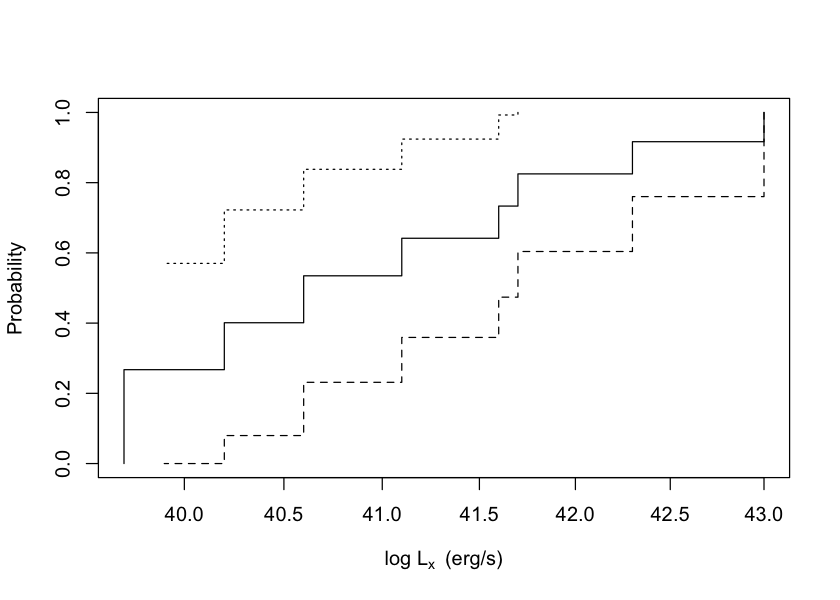

cenfit                  package:NADA                   R Documentation

_C_o_m_p_u_t_e _a_n _E_C_D_F _f_o_r _C_e_n_s_o_r_e_d _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Computes an estimate of an empirical cumulative distribution
     function (ECDF) for censored data using the Kaplan-Meier method.

_U_s_a_g_e:

         cenfit(obs, censored, groups, ...)
     
_A_r_g_u_m_e_n_t_s:

     obs: Either a numeric vector of observations or a formula.  See
          examples below.

censored: A logical vector indicating TRUE where an observation in
          `obs' is censored (a less-than value) and FALSE otherwise.

  groups: A factor vector used for grouping `obs' into subsets.

     ...: Additional items that are common to this function and the
          ‘survfit’ function from the `survival' package.  See Details.

_D_e_t_a_i_l_s:

     This, and related routines, are front ends to routines in the
     ‘survival’ package.  Since the 

In [16]:
# VI.  Calculate the Kaplan-Meier estimator of the galaxy X-ray Luminosity Function from a small dataset.

install.packages('NADA')
library(NADA)

help(cenfit)
galLx <- c(39.7, 42.3, 41.7, 41.6, 43.0, 40.2, 40.6, 41.1, 39.9, 40.7, 41.2, 42.9)
cens <- c(F,F,F,F,F,F,F,F, T,T,T,T)  # FALSE=detected TRUE=left-censored. 
galKM <- cenfit(galLx, cens)
str(galKM)   # The help(cenfit) should describe this output but does not!  

summary(galKM)  # display KM estimator on console
plot(galKM, xlab=expression("log L"[x]~~"(erg/s)"))     # plot KM estimator with 95% confidence band
quantile(galKM) # median and other quantiles
mean(galKM)  ;  sd(galKM)  # mean, uncertainty of mean, standard deviation about the mean

****

**In Section VII** we create a fictitious bivariate *(x,y)* dataset of 500 points where a nonlinear relation between x and y is present.  Also the errors are heteroscedastic; that is, the scatter in *y* depends on the *x* variable.  We will use this dataset here and in the next tutorial.  

Here we show several common plots --  scatterplot, box plot, histogram, cumulative distribution function. Multipanel plots are designed using the *par(mfrow)* plot parameter; see *help(par)*. 

Plots can be downloaded to disk using functions like *pdf()*, *png()*, and *jpeg()* where the user presets the plot window.  But a convenient function is *dev.copy2pdf()* where the current window is downloaded.  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.7575  1.5050  1.5050  2.2525  3.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2424  0.8173  0.9772  1.0224  1.1093  2.4776 

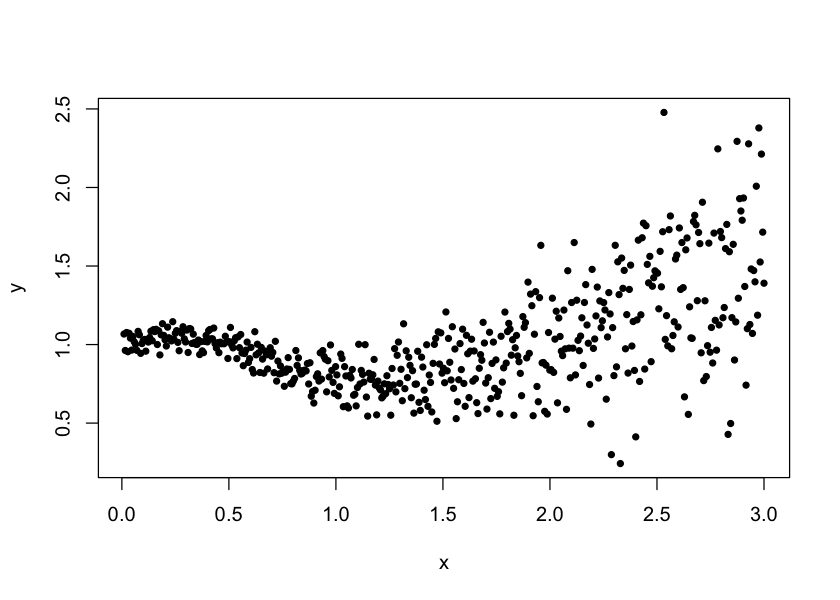

In [17]:
# VII. Examine, summarize and plot bivariate and univariate data 


set.seed(1)
x <- sample(seq(0.01, 3, length.out=500))
y <- 0.5*x + 0.3^(x^2) + rnorm(500, mean=0, sd=(0.05*(1+x^2)))
xy <- cbind(x, y)

plot(xy, pch=20)
summary(x) ; summary(y)   	# Summarizes properties of an R object

pdf 
  2

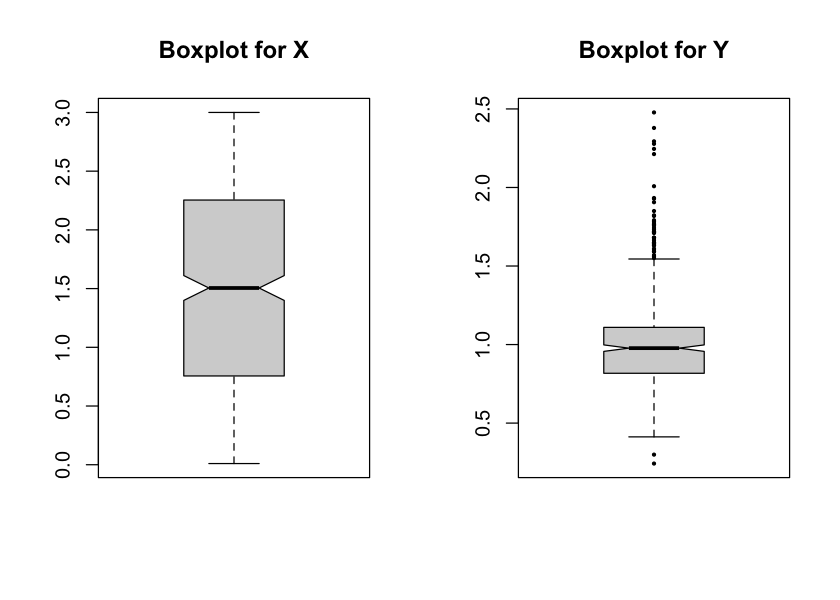

In [18]:
par(mfrow=c(1,2))  		# Set up a two-panel figure
boxplot(x,  notch=T, main='Boxplot for X')  # See help(boxplot.stats) for explanation
boxplot(y,  notch=T, pch=20, cex=0.5, main='Boxplot for Y')
dev.copy2pdf(file='box.pdf')

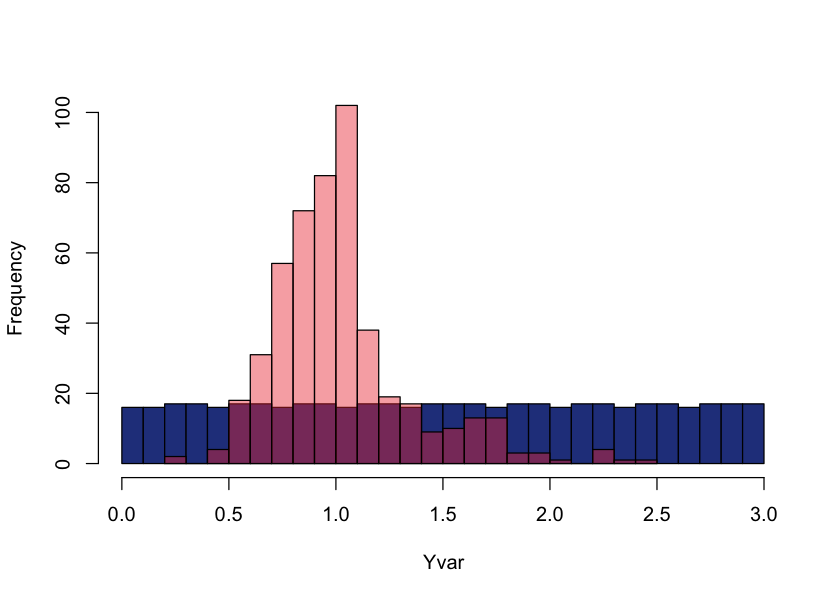

In [19]:
par(mfrow=c(1,1))
hist(x, breaks=30, main='', xlim=range(x), ylim=c(0,100), 
     xlab='Yvar', col='royalblue4')
hist(y, breaks=30, main='', xlab='Yvar', 
     col='#ee3b3b70', add=TRUE) # add=TRUE suppresses a new plot

pdf 
  2

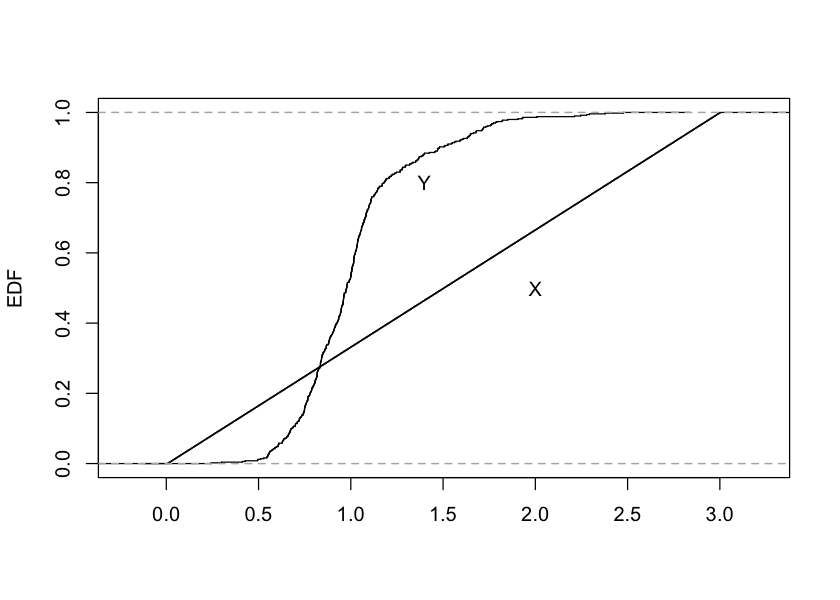

In [20]:
plot(ecdf(x), pch=20, cex=0.0, verticals=TRUE, main='',ylab='EDF',xlab='')  
plot(ecdf(y), pch=20, cex=0.0, verticals=TRUE, add=T)
text(2.0,0.5,"X") ; text(1.4,0.8,"Y")             # text adds annotation within a plot
dev.copy2pdf(file='ecdf.pdf')

****

**Section VIII** gives more practice with vectors and arrays. We show how random samples can be drawn from a dataset. Powerful theorems show that *bootstrap resampling* -- random draws with replacement -- can often give reliable estimates of confidence intervals for statistical quantities derived from the dataset.

In [21]:
# VIII. Arrays, data frames and filtering

# Here xy is an `array' of numbers created by `column bind'

xy <- cbind(x, y)  ;  str(xy) 	

# A data.frame associates names to the columns

xy <- as.data.frame(xy)         
names(xy) <- c('Xvar', 'Yvar')  

# Collect rows where the first column value exceeds 2

high_x1 <- xy[xy[,1]>2,]        
high_x2 <- subset(xy, xy[,1]>2)	# Another way to extract rows
setequal(high_x1, high_x2)      # test equality of two vectors

 num [1:500, 1:2] 1.945 1.005 0.777 2.509 2.826 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "x" "y"


[1] TRUE

In [22]:
# Sampling and bootstrapping 

trials <- sample.int(length(xy[,1]),20) # 20 random rows
xy[trials,]	

# 20 bootstrap resamples

trials <- sample.int(length(xy[,1]),20, replace=T) 
xy[trials,]	

# Estimate the standard error of the median of Yvar

median(xy[,2]) 

# Median absolute deviation estimate of median s.e.

mad(xy[,2]) / sqrt(500)	

,Xvar,Yvar
,<dbl>,<dbl>
365,1.3701804,0.7474357
70,0.6271743,0.9346030
64,2.4127856,1.6647248
500,2.7603206,0.8825305
281,2.0892184,0.9773200
42,0.1238477,1.0158780
39,0.6691182,0.9584457
205,2.3229058,1.3180341
225,0.2137275,1.1109325


,Xvar,Yvar
,<dbl>,<dbl>
305,2.9940080,1.7156475
33,2.0412826,1.1690420
95,0.8968136,0.6275851
328,2.5625852,1.8185672
258,1.4720441,0.5118487
71,2.9580561,1.3992631
103,2.0772345,0.5875749
368,1.0166533,0.7309967
450,0.9267735,0.9471256


[1] 0.9771736

[1] 0.01025085


Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml





ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = xy[, 2], statistic = med, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.9771736 -1.271103e-05  0.01299467

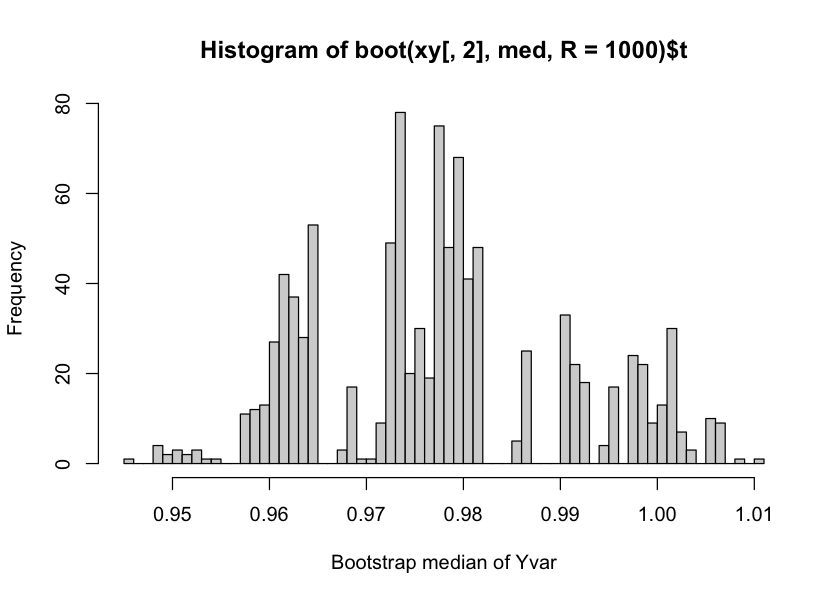

In [23]:
library(boot)  			# The following function in a base-R library
med <- function(x,index){ median(x[index]) }

# Read help(boot) to understand its output list structure

boot(xy[,2], med, R=1000) # Bootstrap estimate of median s.e. 
hist(boot(xy[,2], med, R=1000)$t, breaks=50, 
     xlab='Bootstrap median of Yvar')

> **Exercise**  Use bootstrap resampling (random sampling with replacement) to estimate uncertainties of a statistic. Create a univariate sample with a weird distribution … maybe sampling from a polynomial or nonlinear function over some interval.  First, calculate the median and a robust measure of its standard error: $1.48*(MAD)$ where MAD is the median absolute deviation and the 1.48 scales it to the standard deviation for a Gaussian distribution.   Second, estimate the uncertainty of the median from a bootstrap resampling.  Give the standard error, 95% confidence interval, and plot a histogram of the bootstrap medians.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.7575  1.5050  1.5050  2.2525  3.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.0945 -0.4700  0.7795  0.5665  1.6534  6.2743 

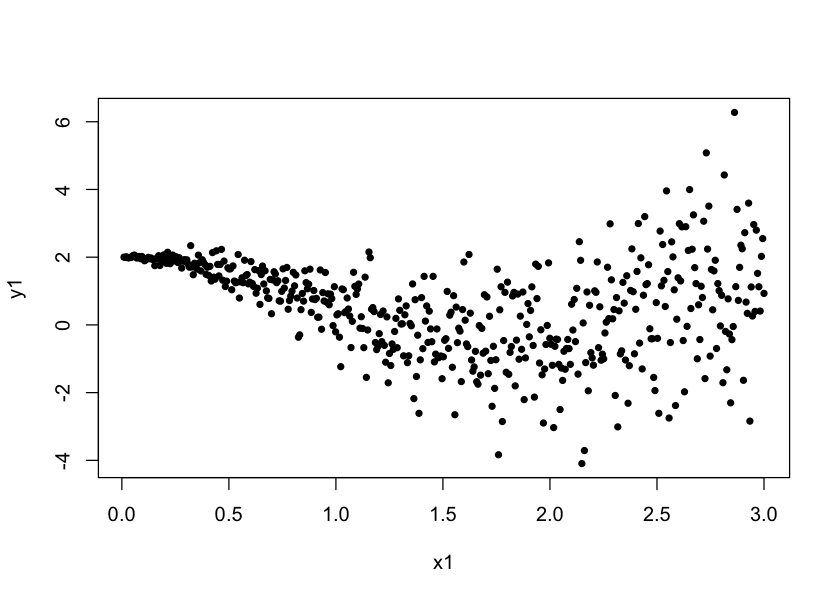

In [24]:
x1 <- sample(seq(0.01, 3, length.out=500))
y1 <- cos(2*x1) + 0.1*x1 + 0.8^(x1^3.5) + rnorm(500, mean=0, sd=sin(0.5*x1) * (1+x1)^0.4)
xy1 <- cbind(x1, y1)

plot(xy1, pch=20)
summary(x1) ; summary(y1)   	# Summarizes properties of an R object

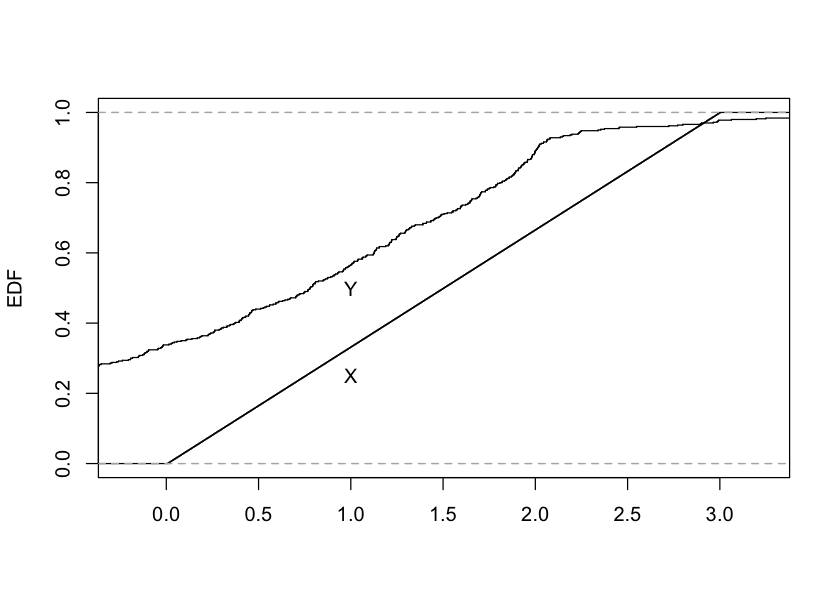

In [25]:
plot(ecdf(x1), pch=20, cex=0.0, verticals=TRUE, main='',ylab='EDF',xlab='')  
plot(ecdf(y1), pch=20, cex=0.0, verticals=TRUE, add=T)
text(1, 0.25, 'X')
text(1, 0.50, 'Y')

In [26]:
# Estimate the standard error of the median of Yvar

median(xy1[,2]) 

# Median absolute deviation estimate of median s.e.

mad(xy1[,2]) / sqrt(500)	

[1] 0.779455

[1] 0.06705824


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = xy1[, 2], statistic = med, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 0.779455 0.0004891021  0.07585682

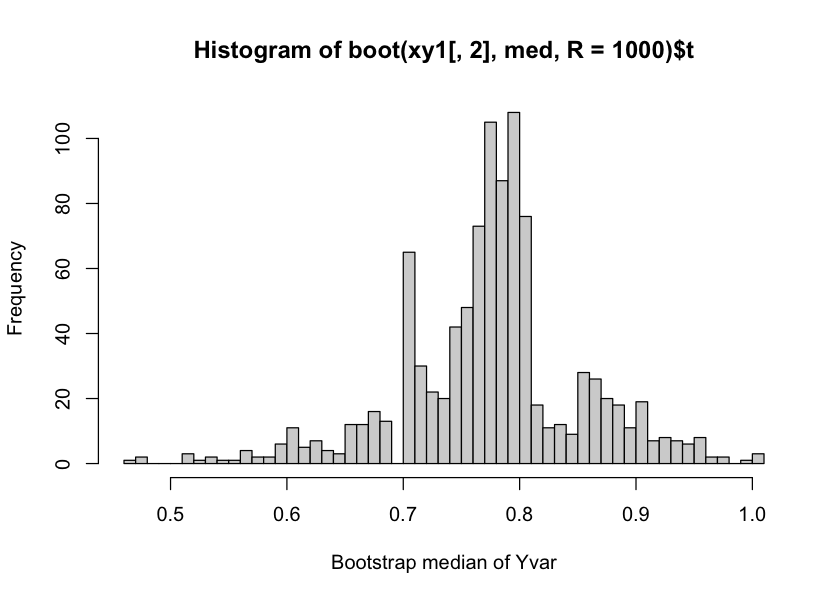

In [27]:
boot(xy1[,2], med, R=1000) # Bootstrap estimate of median s.e. 
hist(boot(xy1[,2], med, R=1000)$t, breaks=50, 
     xlab='Bootstrap median of Yvar')

**Section IX** gives more practice with bivariate plotting, and shows application of two correlation coefficients that give a probability of relationship between the *x* and *y* variables.  Pearson's correlation coefficient is commonly used but is limited: it assumes a linear relationship and requires homoscedastic Gaussian errors. The nonparametric Kendall's tau coefficient makes no assumptions and is therefore more generally useful.  

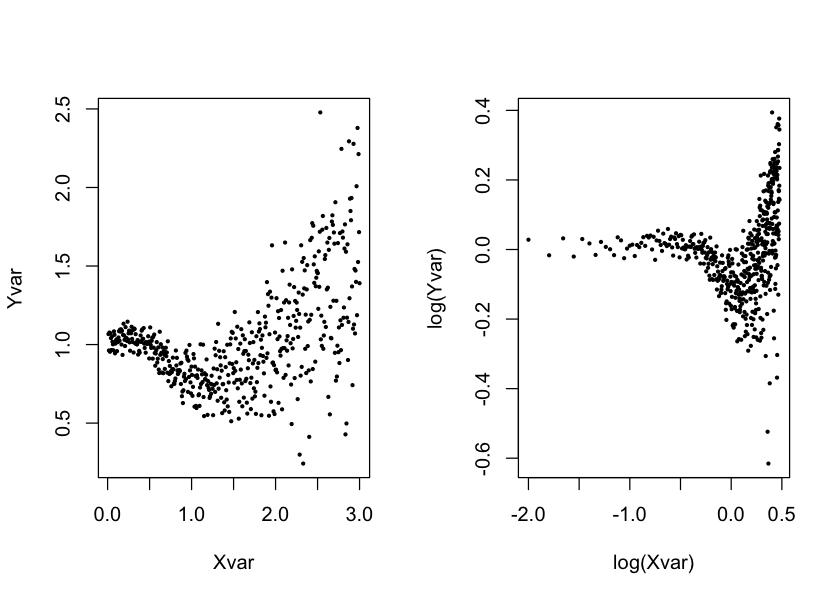

In [28]:
# IX. Bivariate plots and correlation tests

# Scatterplot. See help(points) for symbol shapes defined by the 'pch' argument.
par(mfrow=c(1,2))
plot(xy, pch=20, cex=0.5)	 
plot(log10(xy), pch=20, cex=0.5, xlab='log(Xvar)', ylab='log(Yvar)')

In [29]:
length(x[x>2])		# State length of a vector.  Use `dim' for an array or data.frame.
# Parametric hypothesis test for bivariate correlation 
cor.test(x[x>2],y[x>2], method='pearson')	
# Nonparametric hypothesis test for bivariate correlation
cor.test(x[x>2],y[x>2], method='kendall')	

[1] 167


	Pearson's product-moment correlation

data:  x[x > 2] and y[x > 2]
t = 5.4633, df = 165, p-value = 1.695e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2546585 0.5127717
sample estimates:
      cor 
0.3913858 



	Kendall's rank correlation tau

data:  x[x > 2] and y[x > 2]
z = 5.1525, p-value = 2.571e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2685953 


****

**Section X: R for advanced astronomical data analysis**

R was designed in the 1990s for interactive data exploration and analysis by a single user using a single CPU core with a graphics window.  The compiler was not optimized for speed.  However, around 2012 a new compiler was implemented similar to the one underlying Python.  R and Python thus have roughly similar computational efficiency.  Both are slower than C, C++ and Fortran which are used in both environments for computationally heavy portions of an analysis. Many CRAN packages use C++ under the hood.  

In addition to improved compilers, R has also been adapted for use in a multi-core environment, including GPUs.  Two capabilities are now in base-R (Rmpi and snow), but most are in several dozen CRAN packages; see the [CRAN Task View on High Performance and Parallel Computing with R](https://cran.r-project.org/web/views/HighPerformanceComputing.html).  

Generally, R has not been viewed as a language appropriate for pipeline analysis of large datasets such as those emerging from astronomical satellites or observatories.  This criticism is valid in the sense that it does not have a large and growing software library of specialized code for astronomical data, such as the ~2000 CRAN packages in the _Bioconductor_ toolbox for genomics or the diverse packages in the _astropy_ project in Python.  

However, R can be operated in batch mode, running scripts with the _Rscript_ (or with more flexibility, CRAN package _littler_) command line interface from the operating system prompt.  These commands can be embedded in parallelized scripts for supercomputers using PBS or related scripts.  Using Rscript, we at Penn State have reanalized the full dataset of major surveys from NASA satellites and ground-based observatories involving millions of input and output files.  The motivation for this approach is that the instrument-specific characteristics of the data reduction had already been performed in Python (e.g NASA Levels 2 and 3 data products), and the data were ready for advanced statistical analysis using CRAN packages.  In our case, sophisticated CRAN packages originally designed for econometrics and machine learning play a central role, along with a Fortran code we wrote for a computationally intensive step.  R code for astronomical pipelines can be remarkably brief if one effectively uses the tens-of-thousands of advanced functions available in CRAN.

Many statistical functionalities of R can also be run directly from Python and several other languages through bi-language interfaces.  R scripts can be embedded in Python using [rpy2](https://pypi.org/project/rpy2/) and, conversely, Python programs can be embedded in R scripts using CRAN package [reticulate](https://cran.r-project.org/web/packages/reticulate/index.html) or several other options.


# XI.  Resources for further study of R

We give here a miscellaneous collection of commands and resources useful for learning more about R as a programming language.  

* There are >700 books with 'R' in the title, most presenting both methodology and code tutorials.  A new book on R is published every ~10 days.  Two are devoted specifically to astronomy:
  * [_Modern Statistical Methods for Astronomy with R Applications_](https://doi.org/10.1017/CBO9781139015653), 2012 E. D. Feigelson & G. J. Babu, Cambridge Univ Press
  * [_Bayesian Models for Astrophysical Data Using R, JAGS, Python, and Stan_](https://doi.org/10.1017/CBO9781316459515), 2018, J. M. Hilbe, R. S. de Souza & E. E. O. Ishida, Cambridge Univ Press

* Two high-quality introductions to R:
  * From the R Core Team: https://cran.r-project.org/doc/manuals/R-intro.html
  * From Carnegie-Mellon University: http://www.stat.cmu.edu/~cshalizi/statcomp/14/

* There are vast informal online learning resources about R programming: 
  *  [R-bloggers](https://www.r-bloggers.com) aggregates entries from ~1100 blogs.  
  * [Stack Overflow] has ~400,000 questions and answers about R programming.
  * CRAN packages are often described in two open-access journals: [Journal of Statistical Software](https://www.jstatsoft.org/index) and [The R Journal](https://journal.r-project.org).  These articles often appear as _vignettes_ within the R environment.  



In [ ]:
# A list of the ~30 important CRAN packages embedded in the base-R environment
library()

# A full list of ~400 functions in R's `base' package
library(help = "base")

# Statistics in base R (~400 functions, tens-of-thousands more in CRAN and elsewhere in R)
library(help='stats')

# List current contents of your session environment
ls()

# Programming utilities including:
#    Use `source' to bring in external R scripts
#    Use `edit' to edit an R object
#    Use 'environment' to segregate a collection of objects
#    Functions `debug', `trace' and `browser' assist with code testing
#    Function 'process.events' allows low-level handling of R commands
library(help = 'utils')

# Loops:  for( i in 1:100) { ... }
# Program flow control:  if/else, ifelse, switch, while, repeat, next, break, stop
foo <- 2
if(foo == 1) cat('Hello world!') else cat('Do nothing')
for(i in 1:10) { cat(' Num = ', i, '\n') }

# Graphics and devices in base R (other packages in CRAN)
library(help='graphics')
library(help='grDevices')

# Parallel computing control in base R 
# CRAN has dozens of other high performance computing packages
library(help='parallel')

# Run an R script residing on disk
help(source)

# Save R objects (or your full environment) onto disk
help(save) ; help(load)

# Save or load history of R commands
help(savehistory)  ;  help(loadhistory)

# Connections, pipes, sockets, URLs, clipboard, compression, etc.
help(connections)
 
# Interact with host computer 
Sys.info()
system('ls -l')
system.time(fft(seq(0,1,length.out=1000000)))	# A million fast Fourier transforms

# Construct composite strings using 'paste'
# Extract postions of a string using `substring'
band_ir <- 'J'
paste('NGC1068',band_ir,'FITS', sep='.')

# FITS format reader/writer
install.packages('FITSio') ; library(FITSio)

# IDL Astro Library translated into R
install.packages('astrolibR') ; library(astrolibR)

# R/CRAN functions are public domain and can be wrapped from Python
# programs using package rpy2.  Example:
### pip install rpy2
### import rpy2
### import rpy2.robjects as robjects
### R = robjects.r
### ranGauss = R.rnorm(100)
### print ranGauss

# Python code can be wrapped into R using CRAN package 'reticulate' (among others)
# R has similar interfaces to many other languages.